In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    StratifiedKFold,
    GridSearchCV,
    train_test_split,
)

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("riceClassification.csv", sep=";", index_col="id")


In [3]:
df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
id,,,,,,,,,,,
1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
df["Class"].unique()


array([1, 0], dtype=int64)

In [5]:
df.isna().sum()


Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [6]:
df["Class"].sum() / len(df)


0.5490789111905416

In [7]:
data = df.iloc[:, :-1].values
target = df.iloc[:, -1].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

accuracy_score(y_test, knn.predict(X_test))


0.9818531756942535

In [11]:
search = GridSearchCV(
    knn, {"n_neighbors": np.arange(1, 201)}, cv=5, scoring="accuracy", n_jobs=-1
).fit(X_train, y_train)


In [12]:
search.best_params_

{'n_neighbors': 110}

In [ ]:
k_max = 200
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

avg_score = []

for k in range(1, k_max + 1):
    sum_score = 0
    for train_index, val_index in skf.split(X_train, y_train):
        X, X_val = X_train[train_index], X_train[val_index]
        y, y_val = y_train[train_index], y_train[val_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)
        knn_pred = knn.predict(X_val)
        sum_score += accuracy_score(y_val, knn_pred)
    avg_score.append(sum_score / skf.n_splits)


<AxesSubplot:>

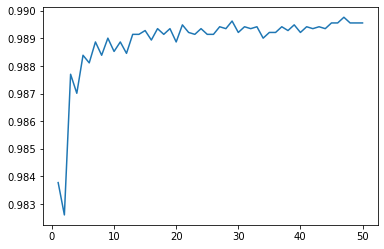

In [41]:
sns.lineplot(y=avg_score, x=np.arange(1, k_max + 1))


In [15]:
knn = KNeighborsClassifier(n_neighbors=110)
knn.fit(X_train, y_train)

accuracy_score(y_test, knn.predict(X_test))


0.9884520208963431

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))


0.9890019246631839

In [17]:
lr.coef_


array([[-1.28655031,  2.82484838, -2.34262699, -2.22982301, -2.12627862,
        -2.67189892,  0.07229811, -0.79551947, -2.56964877,  1.70960926]])

In [18]:
lr = LogisticRegression(solver="liblinear", max_iter=300)


In [19]:
params = {
    "penalty": ["l2", "l1"],
    "C": [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100, 1000],
}

search = GridSearchCV(lr, params, cv=5, scoring="accuracy", n_jobs=-1).fit(
    X_train, y_train
)


In [20]:
search.best_params_


{'C': 10, 'penalty': 'l2'}

In [21]:
lr.set_params(**search.best_params_).fit(X_train, y_train)

accuracy_score(y_test, lr.predict(X_test))


0.9890019246631839

In [22]:
lr.coef_


array([[ 1.32334864, 10.53522639, -4.92472133, -3.11036134, -6.27565961,
        -7.21747278,  0.08599478, -2.36223972, -3.44073414, -6.33622436]])